In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

filepath = "data/results/destination_pred/results_12_07_2021__15_52.csv"

kpis = pd.read_csv(filepath)

In [54]:
# Extract data on the method level
kpis_g_grid = kpis[kpis["PredMethod"]=="g_grid"]
kpis_g = kpis[kpis["PredMethod"]=="g"]
kpis_nn = kpis[kpis["PredMethod"]=="nn"]

In [55]:
kpis_nn

,NumPathsAvail,PercOfPathAvail,PredMethod,InTop1,InTop2,InTop3,PercLbl,Perc1,Perc2,Perc3,Perc4,Perc5,Perc6,Perc7,Perc8
2,0.2,0.2,nn,18.750000,34.375000,46.875000,0.124997,0.633122,0.149427,0.038023,0.018223,0.013812,0.010130,0.007333,4.933249e-03
5,0.2,0.3,nn,18.750000,43.750000,56.250000,0.170456,0.650740,0.114938,0.029156,0.013987,0.008313,0.005877,0.004084,2.448819e-03
8,0.2,0.4,nn,28.125000,53.125000,56.250000,0.242781,0.644627,0.068495,0.021675,0.009334,0.005974,0.003547,0.002353,1.214902e-03
11,0.2,0.5,nn,34.375000,56.250000,56.250000,0.290849,0.599140,0.073105,0.018372,0.008094,0.004943,0.002795,0.001906,7.947153e-04
14,0.2,0.7,nn,40.625000,62.500000,75.000000,0.398853,0.504329,0.058231,0.020645,0.007921,0.004472,0.003158,0.001683,7.076875e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1.0,0.5,nn,20.512821,41.025641,58.974359,0.202139,0.746541,0.040103,0.007147,0.003270,0.000492,0.000215,0.000067,2.528069e-05
206,1.0,0.7,nn,47.435897,78.205128,89.743590,0.497436,0.453394,0.043216,0.004164,0.001117,0.000452,0.000137,0.000072,1.167966e-05
209,1.0,0.8,nn,74.358974,92.307692,97.435897,0.705121,0.285131,0.008383,0.000812,0.000380,0.000118,0.000044,0.000008,3.989735e-06
212,1.0,0.9,nn,94.871795,98.717949,98.717949,0.917019,0.078987,0.003461,0.000404,0.000096,0.000021,0.000009,0.000002,5.231614e-07


In [125]:
# Graphs 
# 1. Top 1/2/3 for each method (x= num paths available) 
# 2. Top 1/2/3 for each method (x= % of paths available in prediction)
# Get the data out of the frame

def plot_results(df, x_col_name, y_col_name, fixed_col_name, fixed_col_val, save_path = None):
    # Fixed list of the method labels
    methods = ["Grid Graph", "WP Graph", "Neural Network"]
    translator = {"PercOfPathAvail": "Percentage of Each Path Available",
    "NumPathsAvail": "Percentage of Data Set Available",
    "InTop1": "Percentage of Correct Perdictions in Top 1",
    "InTop2": "Percentage of Correct Perdictions in Top 2",
    "InTop3": "Percentage of Correct Perdictions in Top 3",
    }

    # Create the graph
    fig, ax = plt.subplots()

    # Set axes labels, title...
    ax.set_title(translator[y_col_name] + " with \n" + translator[fixed_col_name] + " = " + str(int(fixed_col_val*100)) + " %")
    ax.set_xlabel(translator[x_col_name] + " (%)")
    ax.set_ylabel(translator[y_col_name] + " (%)")

    # Plot the data
    for method in methods:
        if method == "Grid Graph":
            method_kpis = kpis[kpis["PredMethod"]=="g_grid"]
        elif method == "WP Graph":
            method_kpis = kpis[kpis["PredMethod"]=="g"]
        elif method == "Neural Network":
            method_kpis = kpis[kpis["PredMethod"]=="nn"]
            
        fix_df = method_kpis[method_kpis[fixed_col_name]==fixed_col_val]

        xy = fix_df[[x_col_name, y_col_name]].to_numpy()
        xy = xy[xy[:, 0].argsort()]

        # Convert to percentage
        xy[:,0] = xy[:,0]*100

        ax.plot(xy[:,0], xy[:,1], marker="o")

    ax.legend(methods)
    if save_path is not None:        
        plt.savefig(os.path.join("data/results/destination_pred", save_path), bbox_inches = "tight")
    return ax



<AxesSubplot:title={'center':'Percentage of Correct Perdictions in Top 1 with \nPercentage of Data Set Available = 100 %'}, xlabel='Percentage of Each Path Available (%)', ylabel='Percentage of Correct Perdictions in Top 1 (%)'>

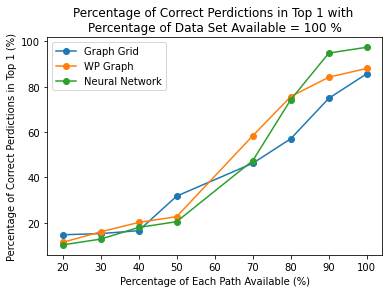

In [127]:
x_col_name = "PercOfPathAvail"
fixed_col_name = "NumPathsAvail"
fixed_col_val = 1.
y_col_name = "InTop1"
plot_results(kpis, x_col_name, y_col_name, fixed_col_name, fixed_col_val, save_path = "res_destPred_a1.png")

<AxesSubplot:title={'center':'Percentage of Correct Perdictions in Top 2 with \nPercentage of Data Set Available = 100 %'}, xlabel='Percentage of Each Path Available (%)', ylabel='Percentage of Correct Perdictions in Top 2 (%)'>

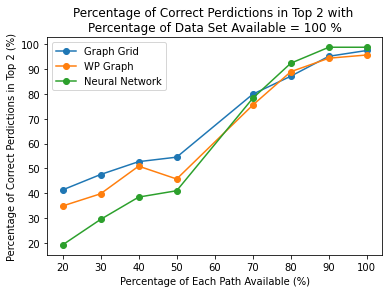

In [128]:
x_col_name = "PercOfPathAvail"
fixed_col_name = "NumPathsAvail"
fixed_col_val = 1.
y_col_name = "InTop2"
plot_results(kpis, x_col_name, y_col_name, fixed_col_name, fixed_col_val, save_path = "res_destPred_a2.png")

<AxesSubplot:title={'center':'Percentage of Correct Perdictions in Top 3 with \nPercentage of Data Set Available = 100 %'}, xlabel='Percentage of Each Path Available (%)', ylabel='Percentage of Correct Perdictions in Top 3 (%)'>

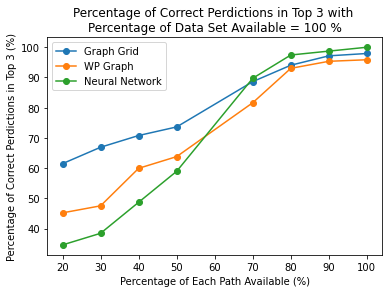

In [129]:
x_col_name = "PercOfPathAvail"
fixed_col_name = "NumPathsAvail"
fixed_col_val = 1.
y_col_name = "InTop3"
plot_results(kpis, x_col_name, y_col_name, fixed_col_name, fixed_col_val, save_path = "res_destPred_a3.png")

<AxesSubplot:title={'center':'Percentage of Correct Perdictions in Top 1 with \nPercentage of Each Path Available = 70 %'}, xlabel='Percentage of Data Set Available (%)', ylabel='Percentage of Correct Perdictions in Top 1 (%)'>

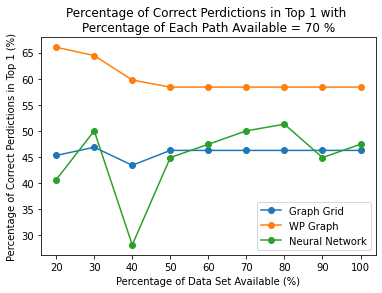

In [146]:
x_col_name = "NumPathsAvail"
fixed_col_name = "PercOfPathAvail"
fixed_col_val = .7
y_col_name = "InTop1"
plot_results(kpis, x_col_name, y_col_name, fixed_col_name, fixed_col_val, save_path = "res_destPred_b1.png")

<AxesSubplot:title={'center':'Percentage of Correct Perdictions in Top 2 with \nPercentage of Each Path Available = 80 %'}, xlabel='Percentage of Data Set Available (%)', ylabel='Percentage of Correct Perdictions in Top 2 (%)'>

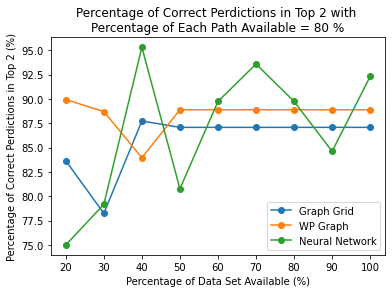

In [147]:
x_col_name = "NumPathsAvail"
fixed_col_name = "PercOfPathAvail"
fixed_col_val = .8
y_col_name = "InTop2"
plot_results(kpis, x_col_name, y_col_name, fixed_col_name, fixed_col_val, save_path = "res_destPred_b2.png")

<AxesSubplot:title={'center':'Percentage of Correct Perdictions in Top 3 with \nPercentage of Each Path Available = 70 %'}, xlabel='Percentage of Data Set Available (%)', ylabel='Percentage of Correct Perdictions in Top 3 (%)'>

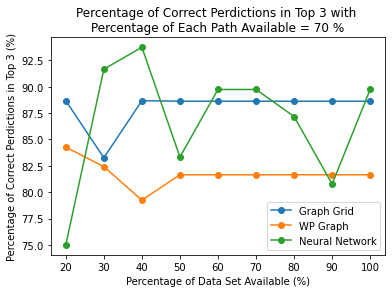

In [149]:
x_col_name = "NumPathsAvail"
fixed_col_name = "PercOfPathAvail"
fixed_col_val = .7
y_col_name = "InTop3"
plot_results(kpis, x_col_name, y_col_name, fixed_col_name, fixed_col_val, save_path = "res_destPred_b3.png")

<AxesSubplot:title={'center':'Percentage of Correct Perdictions in Top 3 with \nPercentage of Data Set Available = 20 %'}, xlabel='Percentage of Each Path Available (%)', ylabel='Percentage of Correct Perdictions in Top 3 (%)'>

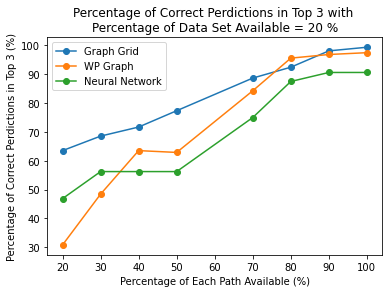

In [154]:
x_col_name = "PercOfPathAvail"
fixed_col_name = "NumPathsAvail"
fixed_col_val = .2
y_col_name = "InTop3"
plot_results(kpis, x_col_name, y_col_name, fixed_col_name, fixed_col_val, save_path = "res_destPred_c1.png")